# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 7.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
408131,0.0024,0.0024,0.0024,0.0488,0.0928,0.8130,0.2490,0.3516,0.0171,0.1221,7,0,18,0
396003,0.1953,0.0024,0.0024,0.0073,0.0220,0.1538,0.1147,0.2124,0.0122,0.2075,4,4,17,17
29802,0.0024,0.3076,0.0073,0.0098,0.0366,1.3550,0.3711,0.1538,0.0781,0.1465,6,6,4,4
350061,0.0049,0.0024,0.0024,0.0024,0.0024,0.1050,0.1636,0.1245,0.0024,0.2002,0,0,0,0
376164,0.0391,0.0024,0.0146,0.0024,0.0122,0.4297,1.0083,0.4395,0.0122,0.2295,2,2,15,15


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465343 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          465343 non-null  float64
 1   Emg2          465343 non-null  float64
 2   Emg3          465343 non-null  float64
 3   Emg4          465343 non-null  float64
 4   Emg5          465343 non-null  float64
 5   Emg6          465343 non-null  float64
 6   Emg7          465343 non-null  float64
 7   Emg8          465343 non-null  float64
 8   Emg9          465343 non-null  float64
 9   Emg10         465343 non-null  float64
 10  repetition    465343 non-null  int64  
 11  rerepetition  465343 non-null  int64  
 12  stimulus      465343 non-null  int64  
 13  restimulus    465343 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.7 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000
mean,0.016418,0.174769,0.072729,0.029455,0.045257,0.323000,0.492774,0.348617,0.112679,0.320979,3.170298,2.318877,5.616943,4.164977
std,0.077547,0.405425,0.272274,0.071421,0.087363,0.445777,0.521808,0.422231,0.280829,0.225615,3.484652,3.300599,6.579710,6.287999
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.063500,0.185500,0.105000,0.002400,0.183100,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.012200,0.188000,0.346700,0.212400,0.004900,0.244100,2.000000,0.000000,3.000000,0.000000
75%,0.007300,0.163600,0.012200,0.019500,0.051300,0.388200,0.603000,0.429700,0.075700,0.412600,6.000000,5.000000,10.000000,8.000000
max,2.321800,4.665500,4.660600,1.892100,2.136200,4.665500,4.663100,4.665500,4.660600,3.398400,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197148
4      15514
8      15513
2      15507
12     15503
7      15490
6      15486
9      15483
5      15470
11     15462
3      15455
1      15433
10     15427
13     10339
17     10337
14     10336
15     10304
16     10259
21      5166
18      5165
19      5160
20      5130
23      5130
22      5126
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.835945,-0.749715,-0.429196,-0.830931
1,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.827101,-0.760588,-0.429196,-0.830931
2,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.827101,-0.771460,-0.429196,-0.820702
3,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.831613,-0.776785,-0.429196,-0.778936
4,-0.190060,-0.466159,-0.283110,-0.410858,-0.520220,-0.742230,-0.840457,-0.782332,-0.429196,-0.758052
...,...,...,...,...,...,...,...,...,...,...
387003,0.360693,-0.225807,-0.266581,-0.410858,-0.389514,-0.322272,-0.946216,-0.831146,-0.082610,-1.247319
387004,0.604777,-0.220085,-0.266581,-0.410858,-0.257738,-0.158232,-0.946216,-0.831146,-0.082610,-1.257548
387005,0.757486,-0.220085,-0.266581,-0.410858,-0.232025,-0.112293,-0.946216,-0.831146,-0.082610,-1.278431
387006,0.757486,-0.220085,-0.266581,-0.410858,-0.284522,-0.153198,-0.946216,-0.831146,-0.082610,-1.309543


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
77/77 [==============================] - 3s 31ms/step - loss: 1.3770 - accuracy: 0.6376 - val_loss: 0.9224 - val_accuracy: 0.7400
Epoch 2/100
77/77 [==============================] - 2s 27ms/step - loss: 0.8251 - accuracy: 0.7644 - val_loss: 0.7021 - val_accuracy: 0.7952
Epoch 3/100
77/77 [==============================] - 2s 26ms/step - loss: 0.6685 - accuracy: 0.8037 - val_loss: 0.5944 - val_accuracy: 0.8244
Epoch 4/100
77/77 [==============================] - 2s 25ms/step - loss: 0.5732 - accuracy: 0.8289 - val_loss: 0.5513 - val_accuracy: 0.8389
Epoch 5/100
77/77 [==============================] - 2s 26ms/step - loss: 0.5135 - accuracy: 0.8440 - val_loss: 0.4740 - val_accuracy: 0.8556
Epoch 6/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4674 - accuracy: 0.8564 - val_loss: 0.4341 - val_accuracy: 0.8649
Epoch 7/100
77/77 [==============================] - 2s 25ms/step - loss: 0.4339 - accuracy: 0.8658 - val_loss: 0.4297 - val_accuracy: 0.8692
Epoch 

77/77 [==============================] - 2s 27ms/step - loss: 0.1251 - accuracy: 0.9571 - val_loss: 0.1499 - val_accuracy: 0.9504
Epoch 59/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1252 - accuracy: 0.9565 - val_loss: 0.1432 - val_accuracy: 0.9521
Epoch 60/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1224 - accuracy: 0.9576 - val_loss: 0.1411 - val_accuracy: 0.9529
Epoch 61/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1214 - accuracy: 0.9578 - val_loss: 0.1536 - val_accuracy: 0.9502
Epoch 62/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1217 - accuracy: 0.9576 - val_loss: 0.1402 - val_accuracy: 0.9540
Epoch 63/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1192 - accuracy: 0.9582 - val_loss: 0.1434 - val_accuracy: 0.9532
Epoch 64/100
77/77 [==============================] - 2s 27ms/step - loss: 0.1171 - accuracy: 0.9588 - val_loss: 0.1399 - val_accuracy: 0.9543
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

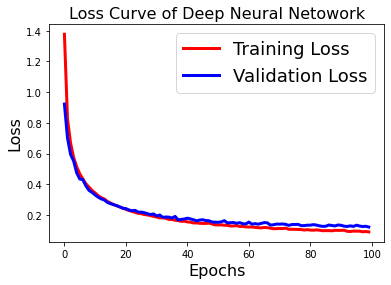

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

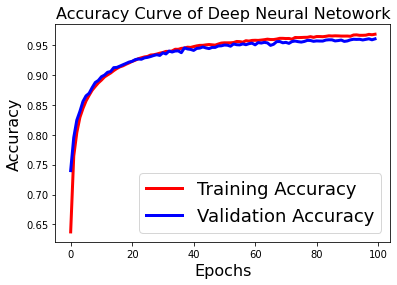

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 0, 19,  0, ..., 13,  0,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

19

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 96.01819074442521


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     39037
           1       0.97      0.92      0.94      2203
           2       0.91      0.90      0.90      2428
           3       0.95      0.94      0.95      2206
           4       0.96      0.96      0.96      2160
           5       0.97      0.97      0.97      1972
           6       0.99      0.91      0.95      2193
           7       0.95      0.95      0.95      2070
           8       0.95      0.95      0.95      2293
           9       0.95      0.93      0.94      1921
          10       0.91      0.81      0.86      2093
          11       0.97      0.93      0.95      2006
          12       0.94      0.95      0.94      2165
          13       0.98      0.98      0.98      1405
          14       0.97      0.96      0.97      1393
          15       0.93      0.89      0.91      1663
          16       0.98      0.98      0.98      1693
 

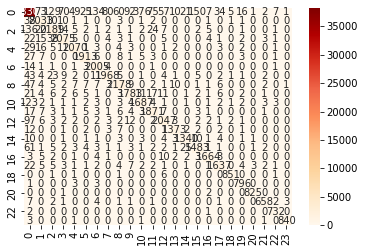

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.30264075863672774
MSE: 3.233340223766828
RMSE: 1.7981491105486296


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9600638687814999
Recall Score :  0.9601819074442521
f1_score :  0.959908484720299
